In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("hongos_actualizado.csv")  


duplicates = df[df.duplicated()]
print(f"\n🔁 Duplicate rows found: {len(duplicates)}")
if not duplicates.empty:
    print(duplicates)


constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"\n📌 Constant columns: {constant_cols}")


corr_matrix = df.select_dtypes(include=[np.number]).corr().abs()
high_corr_pairs = [(i, j, corr_matrix.loc[i, j]) 
                   for i in corr_matrix.columns 
                   for j in corr_matrix.columns 
                   if i != j and corr_matrix.loc[i, j] > 0.95]
print(f"\n📈 Highly correlated numeric pairs (correlation > 0.95):")
for i, j, corr in high_corr_pairs:
    print(f"   {i} <--> {j} : {corr:.2f}")


null_threshold = 0.5  
mostly_null = df.columns[df.isnull().mean() > null_threshold].tolist()
print(f"\n❓ Columns with >{null_threshold*100:.0f}% missing values: {mostly_null}")



🔁 Duplicate rows found: 0

📌 Constant columns: []

📈 Highly correlated numeric pairs (correlation > 0.95):

❓ Columns with >50% missing values: []


In [6]:
df.head()

,Especie,color_red_mean,color_red_std,color_green_mean,color_green_std,color_blue_mean,color_blue_std,texture_contrast,texture_correlation,texture_homogeneity,texture_energy,shape_area,shape_perimeter,shape_circularity,Toxicidad,Psilocibina
0,Amanita citrina,-2.207687,-0.815295,-2.190082,-0.653729,-1.410471,-0.377814,-1.132658,1.128306,2.170879,0.939289,-1.590588,-1.764976,2.807974,Desconocido,No
1,Amanita citrina,-0.192422,-0.233651,-0.400477,-0.307439,-0.025129,-0.248397,-0.911551,0.911014,0.383241,-0.142974,-0.971189,-0.102392,-0.704029,Desconocido,No
2,Amanita citrina,-2.292385,-2.114442,-1.951374,-1.908640,-1.604045,-1.604168,0.456145,-2.969912,-0.631618,-0.253846,0.400877,1.194583,-0.735739,Desconocido,No
3,Amanita citrina,-1.176321,0.843232,-1.320871,0.883463,-0.823435,0.703251,0.874084,-0.260025,-0.669165,-0.277161,-0.844627,-0.525161,-0.369751,Desconocido,No
4,Amanita citrina,-0.353777,0.941317,-0.824379,1.180262,-0.792903,1.130864,-1.061963,1.177472,2.038559,0.317614,-0.759876,-1.396677,2.624207,Desconocido,No


In [8]:
df.isnull().sum()

Especie                0
color_red_mean         0
color_red_std          0
color_green_mean       0
color_green_std        0
color_blue_mean        0
color_blue_std         0
texture_contrast       0
texture_correlation    0
texture_homogeneity    0
texture_energy         0
shape_area             0
shape_perimeter        0
shape_circularity      0
Toxicidad              0
Psilocibina            0
dtype: int64

In [4]:

print(f"Original shape: {df.shape}")


df_cleaned = df.drop_duplicates()


print(f"Shape after removing duplicates: {df_cleaned.shape}")


df_cleaned.to_csv("hongos_actualizado.csv", index=False)
print("✅ Cleaned CSV saved as 'hongos_actualizado.csv'")

Original shape: (77281, 16)
Shape after removing duplicates: (77281, 16)
✅ Cleaned CSV saved as 'hongos_actualizado.csv'


In [6]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])


df_scaled.to_csv("hongos_actualizado.csv", index=False)
print("✅ Standardized dataset saved as 'hongos_actualizado.csv'")

✅ Standardized dataset saved as 'hongos_actualizado.csv'


In [8]:
df = df.dropna()


print("\n🔍 Object columns:")
object_cols = df.select_dtypes(include='object').columns.tolist()
print(object_cols)


label_encoders = {}
for col in object_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  
    label_encoders[col] = le  


print("\n✅ Final column types:\n", df.dtypes)


target = 'Toxicidad'  
X = df.drop(columns=[target])
y = df[target]


if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


🔍 Object columns:
['Especie', 'Toxicidad', 'Psilocibina']
Encoding column: Especie
Encoding column: Toxicidad
Encoding column: Psilocibina

✅ Final column types:
 Especie                  int32
color_red_mean         float64
color_red_std          float64
color_green_mean       float64
color_green_std        float64
color_blue_mean        float64
color_blue_std         float64
texture_contrast       float64
texture_correlation    float64
texture_homogeneity    float64
texture_energy         float64
shape_area             float64
shape_perimeter        float64
shape_circularity      float64
Toxicidad                int32
Psilocibina              int32
dtype: object



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.70      0.98      0.82     10522
           1       0.00      0.00      0.00      2630
           2       0.70      0.19      0.30      2305

    accuracy                           0.70     15457
   macro avg       0.46      0.39      0.37     15457
weighted avg       0.58      0.70      0.60     15457



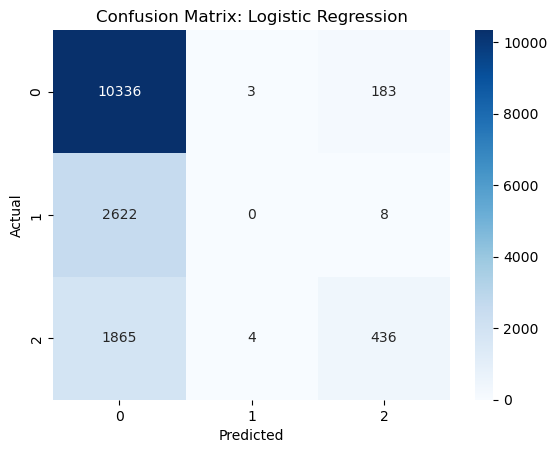


=== KNN ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10522
           1       0.95      0.97      0.96      2630
           2       0.97      0.93      0.95      2305

    accuracy                           0.97     15457
   macro avg       0.97      0.96      0.96     15457
weighted avg       0.97      0.97      0.97     15457



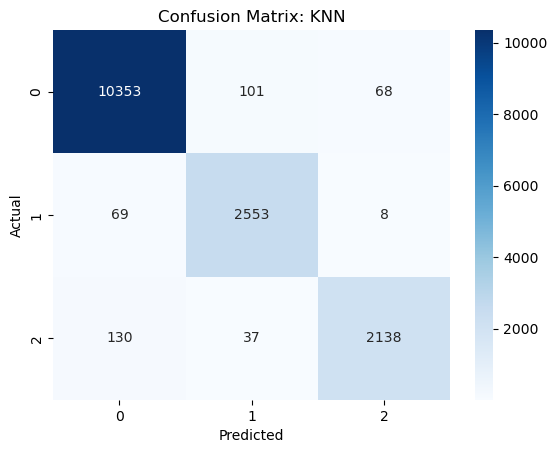


=== Decision Tree ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10522
           1       1.00      1.00      1.00      2630
           2       1.00      1.00      1.00      2305

    accuracy                           1.00     15457
   macro avg       1.00      1.00      1.00     15457
weighted avg       1.00      1.00      1.00     15457



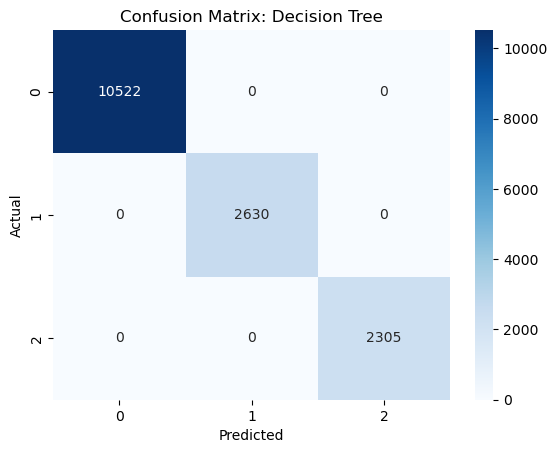


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     10522
           1       1.00      0.13      0.23      2630
           2       1.00      0.40      0.57      2305

    accuracy                           0.76     15457
   macro avg       0.91      0.51      0.55     15457
weighted avg       0.82      0.76      0.70     15457



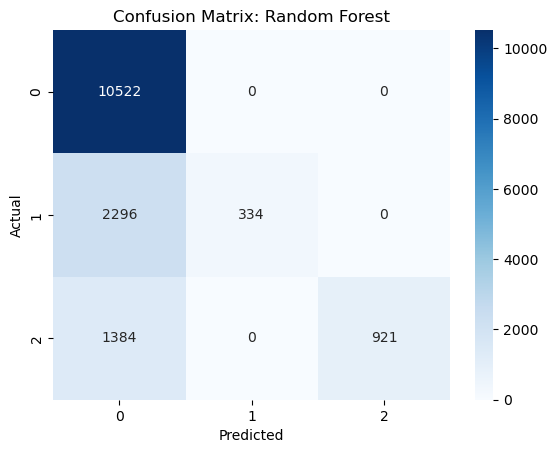


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10522
           1       1.00      0.98      0.99      2630
           2       1.00      0.94      0.97      2305

    accuracy                           0.99     15457
   macro avg       0.99      0.97      0.98     15457
weighted avg       0.99      0.99      0.99     15457



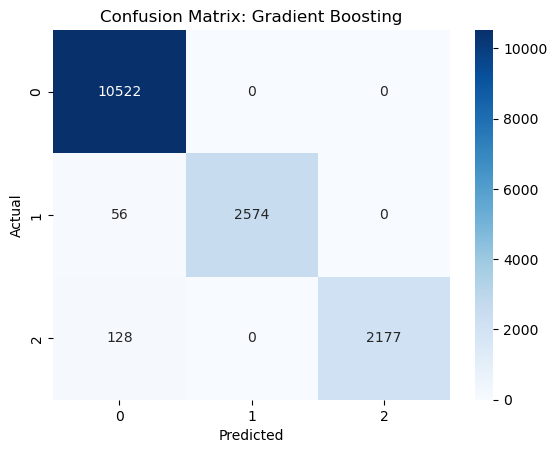


=== AdaBoost ===


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.96      0.92     10522
           1       0.87      0.89      0.88      2630
           2       0.92      0.55      0.69      2305

    accuracy                           0.89     15457
   macro avg       0.89      0.80      0.83     15457
weighted avg       0.89      0.89      0.88     15457



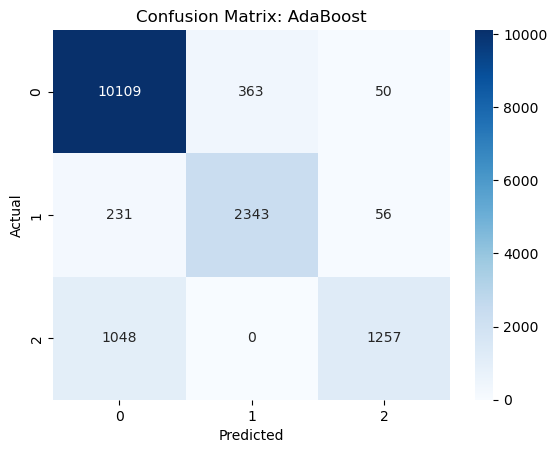


=== Bagging ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10522
           1       1.00      1.00      1.00      2630
           2       1.00      1.00      1.00      2305

    accuracy                           1.00     15457
   macro avg       1.00      1.00      1.00     15457
weighted avg       1.00      1.00      1.00     15457



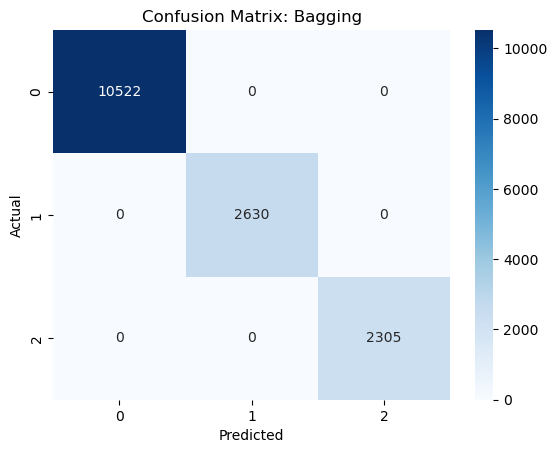


=== SVM (RBF Kernel) ===


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.73      0.99      0.84     10522
           1       0.00      0.00      0.00      2630
           2       0.82      0.40      0.54      2305

    accuracy                           0.73     15457
   macro avg       0.52      0.46      0.46     15457
weighted avg       0.62      0.73      0.65     15457



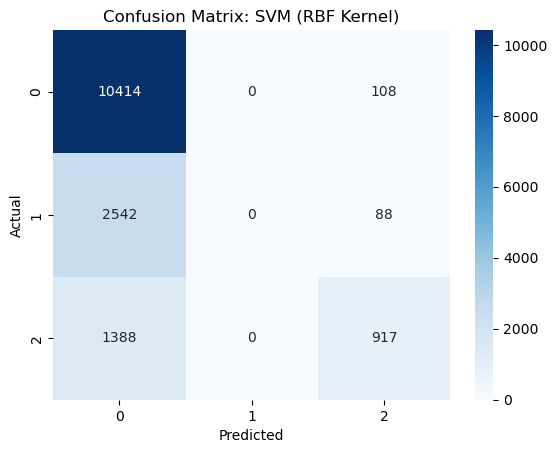


=== Naive Bayes (Gaussian) ===
              precision    recall  f1-score   support

           0       0.90      0.06      0.11     10522
           1       0.22      0.51      0.31      2630
           2       0.21      0.78      0.32      2305

    accuracy                           0.24     15457
   macro avg       0.44      0.45      0.25     15457
weighted avg       0.68      0.24      0.17     15457



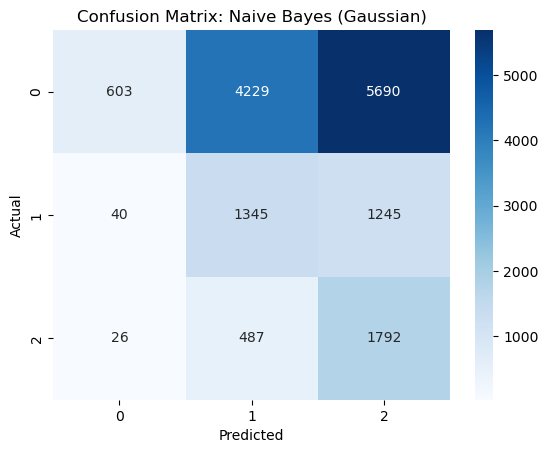


=== Naive Bayes (Bernoulli) ===
              precision    recall  f1-score   support

           0       0.68      1.00      0.81     10522
           1       0.00      0.00      0.00      2630
           2       0.00      0.00      0.00      2305

    accuracy                           0.68     15457
   macro avg       0.23      0.33      0.27     15457
weighted avg       0.46      0.68      0.55     15457



C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


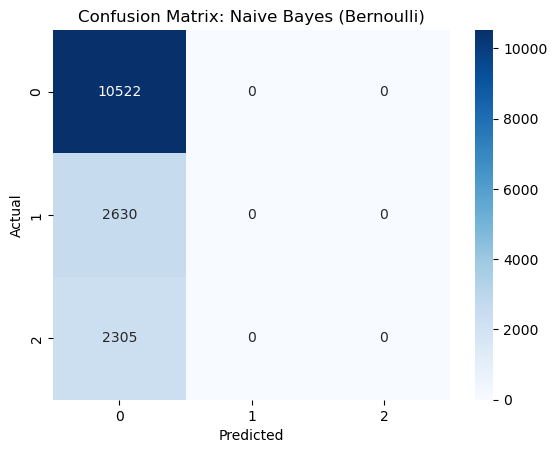


=== LDA ===
              precision    recall  f1-score   support

           0       0.70      0.97      0.81     10522
           1       0.17      0.00      0.00      2630
           2       0.62      0.22      0.32      2305

    accuracy                           0.69     15457
   macro avg       0.50      0.40      0.38     15457
weighted avg       0.60      0.69      0.60     15457



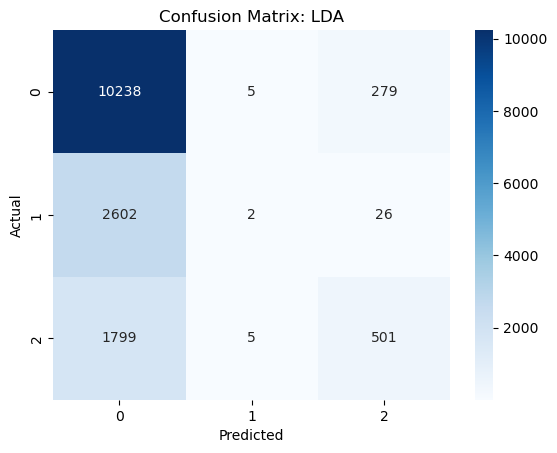


=== QDA ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10522
           1       0.17      1.00      0.29      2630
           2       0.00      0.00      0.00      2305

    accuracy                           0.17     15457
   macro avg       0.06      0.33      0.10     15457
weighted avg       0.03      0.17      0.05     15457



C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:972: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:972: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:975: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

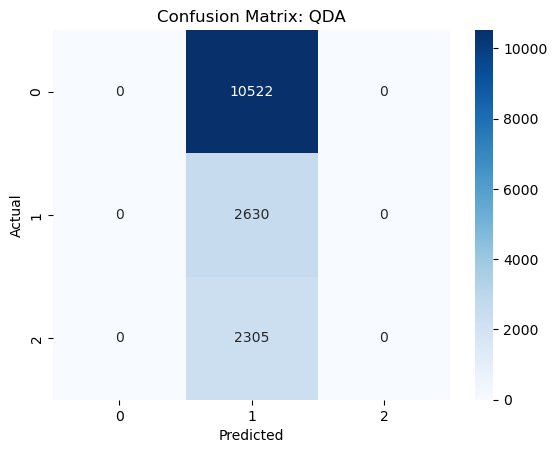


=== XGBoost ===


C:\Users\KIIT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:22:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10522
           1       1.00      1.00      1.00      2630
           2       1.00      1.00      1.00      2305

    accuracy                           1.00     15457
   macro avg       1.00      1.00      1.00     15457
weighted avg       1.00      1.00      1.00     15457



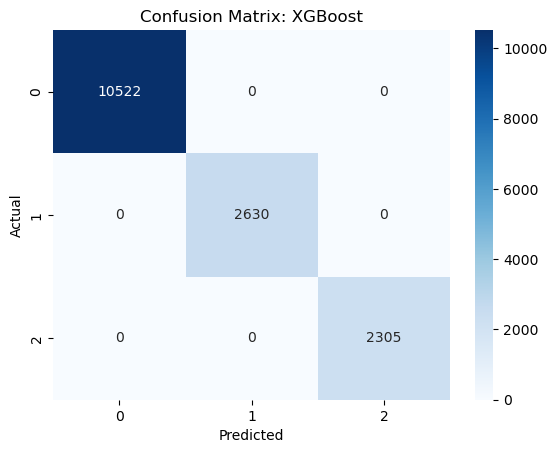


=== LightGBM ===
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3417
[LightGBM] [Info] Number of data points in the train set: 61824, number of used features: 15
[LightGBM] [Info] Start training from score -0.382701
[LightGBM] [Info] Start training from score -1.786822
[LightGBM] [Info] Start training from score -1.893847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10522
           1       1.00      1.00      1.00      2630
           2       1.00      1.00      1.00      2305

    accuracy                           1.00     15457
   macro avg       1.00      1.00      1.00     15457
weighted avg       1.00      1.00      1.00     15457



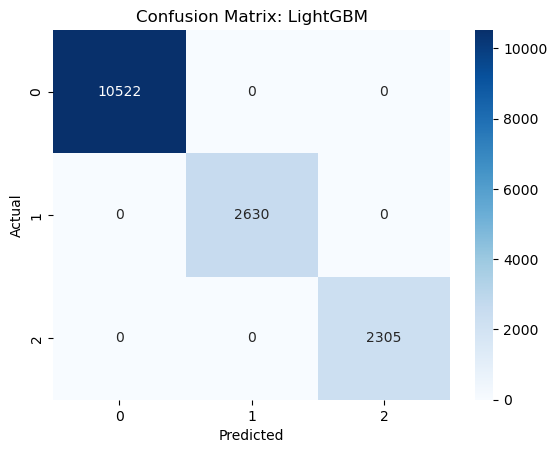


=== CatBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10522
           1       1.00      1.00      1.00      2630
           2       1.00      1.00      1.00      2305

    accuracy                           1.00     15457
   macro avg       1.00      1.00      1.00     15457
weighted avg       1.00      1.00      1.00     15457



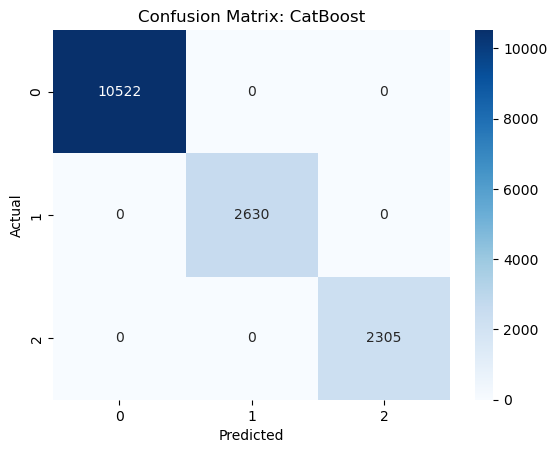


=== Extra Trees ===
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10522
           1       0.99      0.64      0.78      2630
           2       0.99      0.66      0.79      2305

    accuracy                           0.89     15457
   macro avg       0.95      0.77      0.83     15457
weighted avg       0.90      0.89      0.88     15457



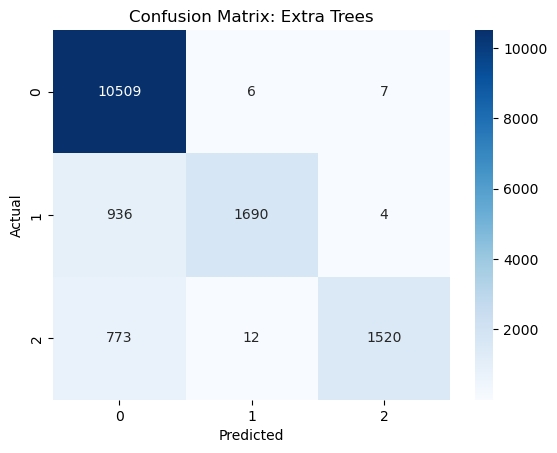


=== HistGradientBoosting ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10522
           1       1.00      1.00      1.00      2630
           2       1.00      1.00      1.00      2305

    accuracy                           1.00     15457
   macro avg       1.00      1.00      1.00     15457
weighted avg       1.00      1.00      1.00     15457



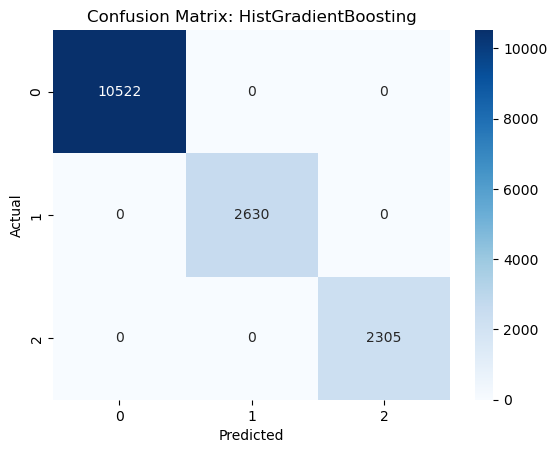


=== Ridge Classifier ===
              precision    recall  f1-score   support

           0       0.69      0.99      0.81     10522
           1       0.00      0.00      0.00      2630
           2       0.75      0.10      0.17      2305

    accuracy                           0.69     15457
   macro avg       0.48      0.36      0.33     15457
weighted avg       0.58      0.69      0.58     15457



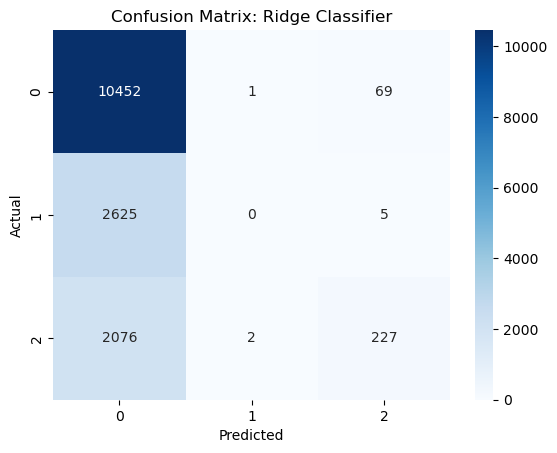


=== PassiveAggressive ===
              precision    recall  f1-score   support

           0       0.73      0.32      0.45     10522
           1       0.20      0.62      0.31      2630
           2       0.39      0.46      0.42      2305

    accuracy                           0.40     15457
   macro avg       0.44      0.47      0.39     15457
weighted avg       0.59      0.40      0.42     15457



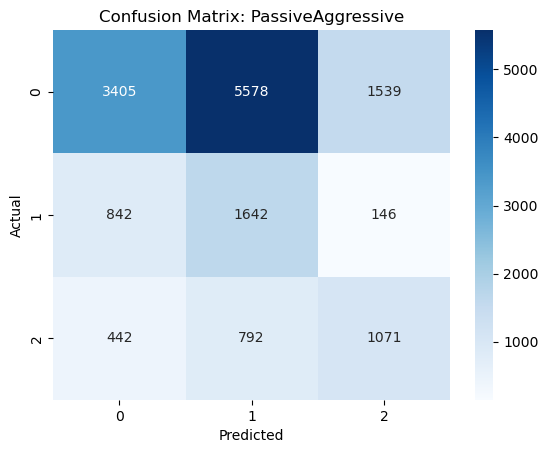

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier, Perceptron

models = {
    "Logistic Regression": LogisticRegression(C=0.5, penalty='l2', solver='liblinear', max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance', metric='minkowski', p=2),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=3, random_state=42),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "SVM (RBF Kernel)": SVC(C=2.0, gamma='scale', kernel='rbf', probability=True, random_state=42),
#    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Extra Trees": ExtraTreesClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "PassiveAggressive": PassiveAggressiveClassifier()
}


for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    
    print(classification_report(y_test, y_pred))

 
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [2]:
!pip install xgboost lightgbm catboost



=== MLP Classifier (Neural Network) ===
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10522
           1       0.81      0.66      0.73      2630
           2       0.93      0.68      0.78      2305

    accuracy                           0.87     15457
   macro avg       0.87      0.77      0.81     15457
weighted avg       0.87      0.87      0.86     15457



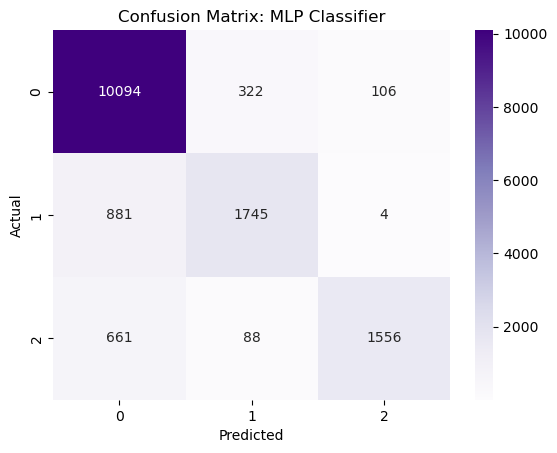

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)


print("\n=== MLP Classifier (Neural Network) ===")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix: MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


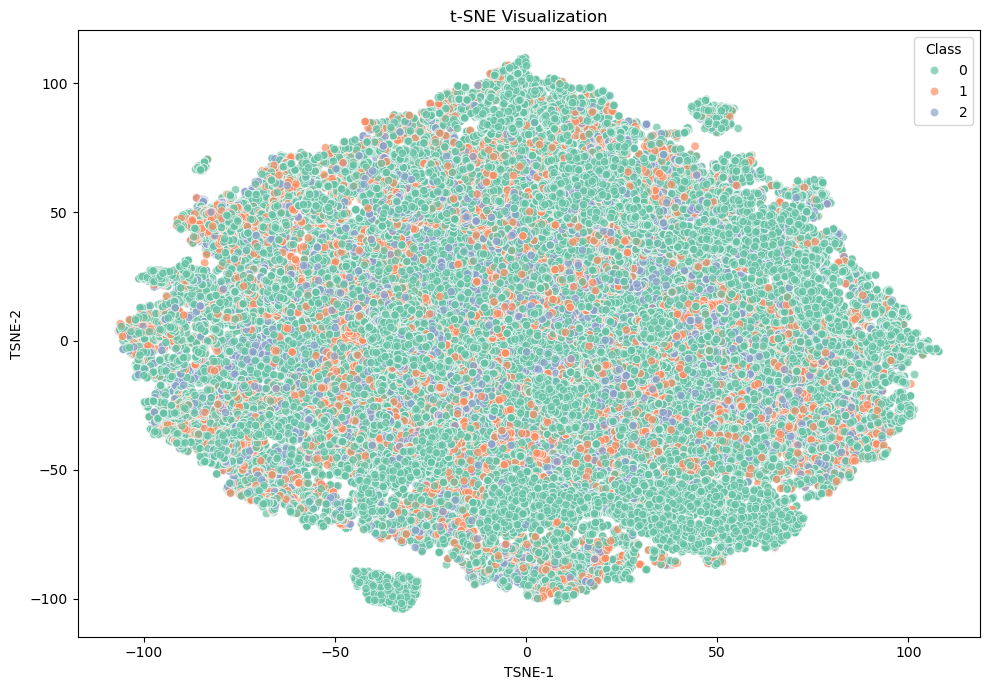

In [13]:
from sklearn.manifold import TSNE

X = pd.get_dummies(X)


X_scaled = StandardScaler().fit_transform(X)


tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


tsne_df = pd.DataFrame(X_tsne, columns=["TSNE-1", "TSNE-2"])
tsne_df["Label"] = y.values

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=tsne_df, x="TSNE-1", y="TSNE-2", hue="Label", palette="Set2", alpha=0.7)
plt.title("t-SNE Visualization")
plt.legend(title="Class", loc="best")
plt.tight_layout()
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_2432\1550882703.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(20), x='Importance', y='Feature', palette='viridis')


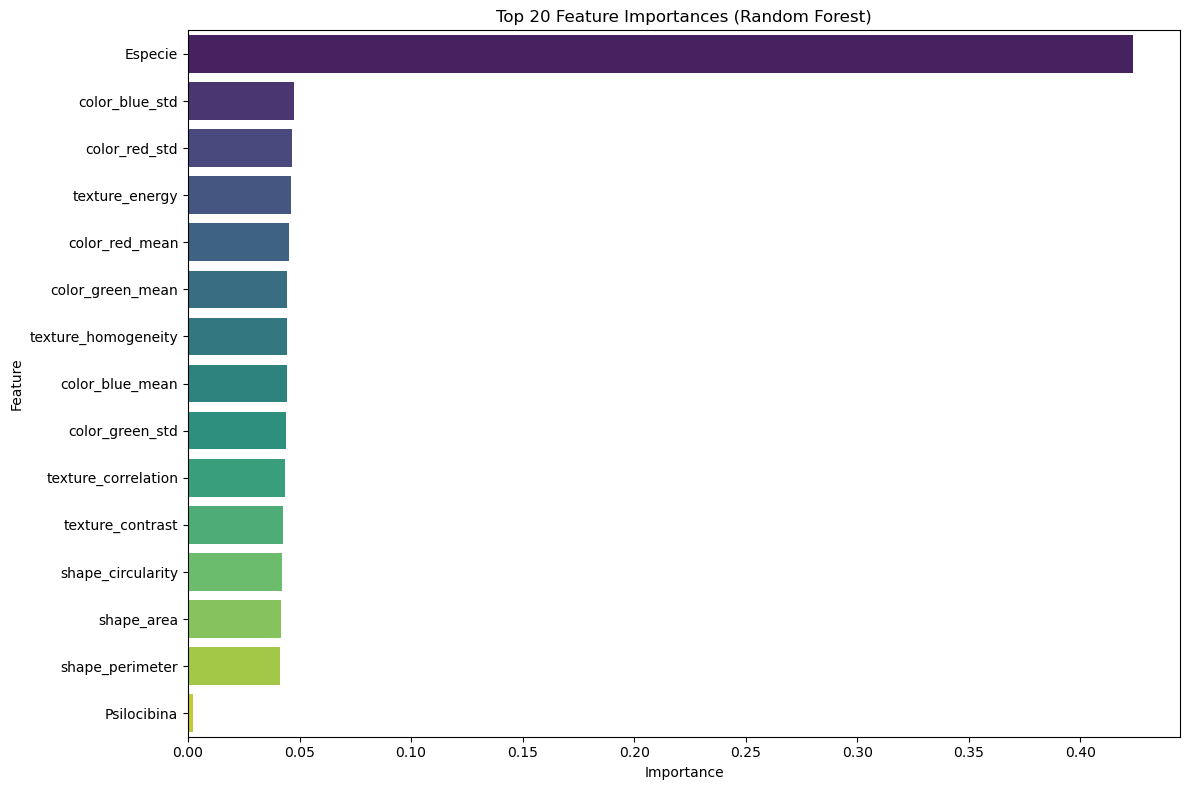

In [19]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_
feature_names = pd.get_dummies(df.drop('Toxicidad', axis=1)).columns


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


In [29]:

def memory_usage_mb(obj):
    """Handles both DataFrames and Series."""
    if isinstance(obj, pd.DataFrame):
        return obj.memory_usage(deep=True).sum() / 1024 ** 2
    else:  # it's a Series
        return obj.memory_usage(deep=True) / 1024 ** 2


def reduce_memory_usage(df):
    for col in df.columns:
        col_type = df[col].dtype

        if pd.api.types.is_numeric_dtype(col_type):
            c_min = df[col].min()
            c_max = df[col].max()

            if pd.api.types.is_integer_dtype(col_type):
                if c_min >= 0:
                    if c_max < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif c_max < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif c_max < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    else:
                        df[col] = df[col].astype(np.int64)

            elif pd.api.types.is_float_dtype(col_type):
                df[col] = df[col].astype(np.float32)

        elif pd.api.types.is_object_dtype(col_type):
            num_unique = df[col].nunique()
            num_total = len(df[col])
            if num_unique / num_total < 0.5:
                df[col] = df[col].astype('category')

    return df


initial_mem = memory_usage_mb(df)


df_optimized = reduce_memory_usage(df.copy())
optimized_mem = memory_usage_mb(df_optimized)

X = df_optimized.drop('Toxicidad', axis=1)  # Replace with your label column
y = df_optimized['Toxicidad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_mem = memory_usage_mb(X_train) + memory_usage_mb(y_train)
test_mem = memory_usage_mb(X_test) + memory_usage_mb(y_test)


print(f"Initial Memory (MB): {initial_mem}")
print(f"Optimized Memory (MB): {optimized_mem}")
print(f"Training Data Memory (MB): {train_mem}")
print(f"Testing Data Memory (MB): {test_mem}")


Initial Memory (MB): 8.549430847167969
Optimized Memory (MB): 4.053675651550293
Training Data Memory (MB): 4.1861572265625
Testing Data Memory (MB): 1.0466070175170898
